In [ ]:
from model_data_train import One_hidden_layer, generate_data_exp1, generate_data_exp2, train 
import torch as t
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tensor(1.7167)
tensor(1.7167)


100%|██████████| 10000/10000 [00:01<00:00, 6797.97it/s]


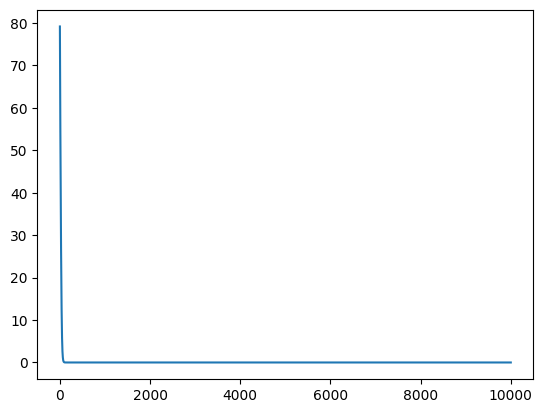

1
tensor(1.8549)
tensor(1.9808)


100%|██████████| 10000/10000 [00:01<00:00, 6461.73it/s]


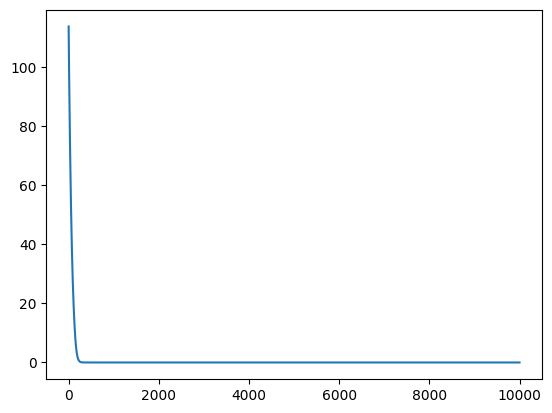

2
tensor(1.0783)
tensor(1.7238)


100%|██████████| 10000/10000 [00:01<00:00, 6080.27it/s]


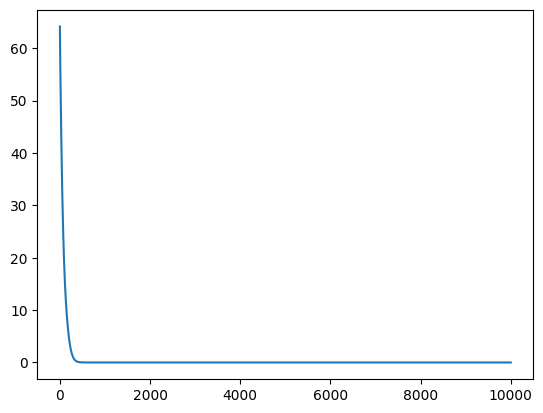

3
tensor(1.0596)
tensor(1.8462)


100%|██████████| 10000/10000 [00:01<00:00, 6107.86it/s]


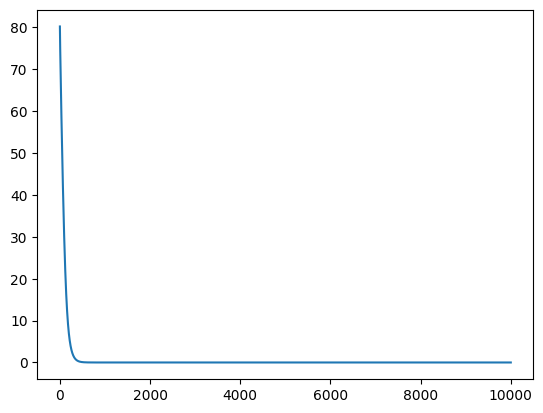

4
tensor(1.1367)
tensor(1.5909)


100%|██████████| 10000/10000 [00:01<00:00, 5895.23it/s]


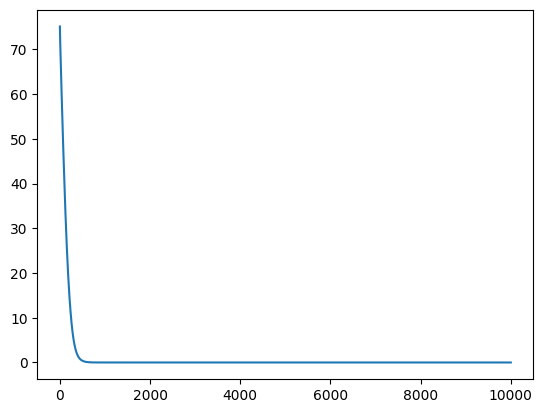

5
tensor(1.0734)
tensor(1.9441)


100%|██████████| 10000/10000 [00:01<00:00, 5976.36it/s]


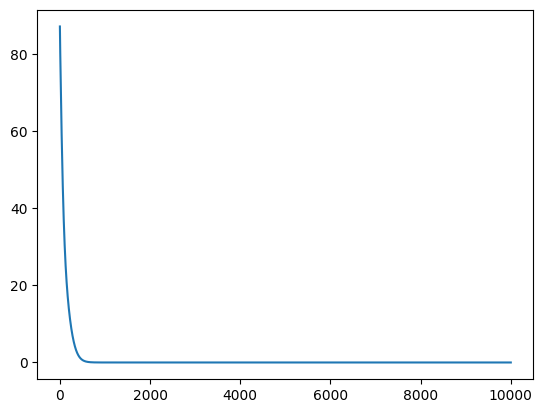

6
tensor(1.0024)
tensor(1.9778)


100%|██████████| 10000/10000 [00:01<00:00, 5718.19it/s]


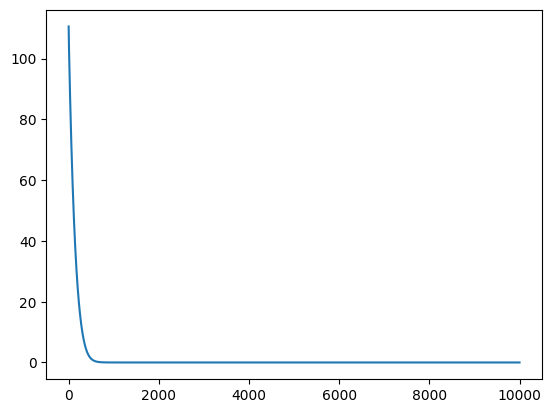

7
tensor(1.0144)
tensor(1.9640)


100%|██████████| 10000/10000 [00:01<00:00, 5928.88it/s]


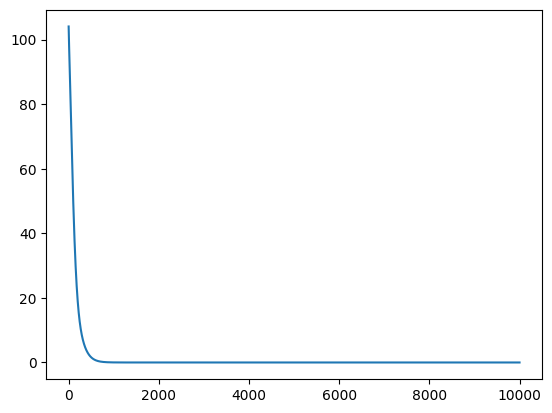

8
tensor(1.2642)
tensor(1.9905)


100%|██████████| 10000/10000 [00:01<00:00, 5443.26it/s]


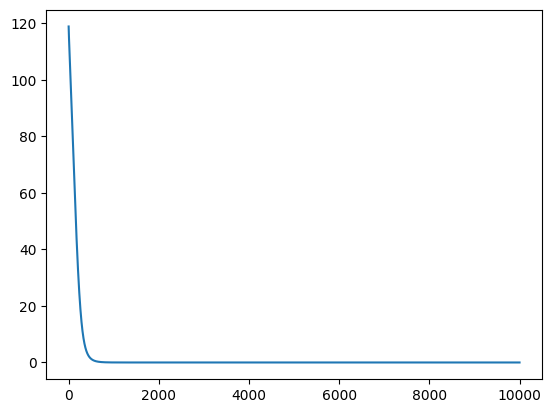

9
tensor(1.0122)
tensor(1.9432)


100%|██████████| 10000/10000 [00:01<00:00, 5728.66it/s]


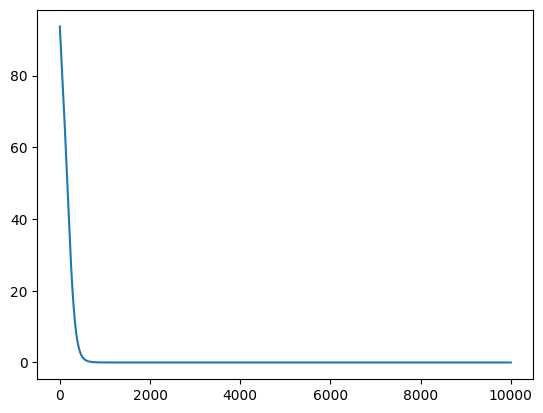

10


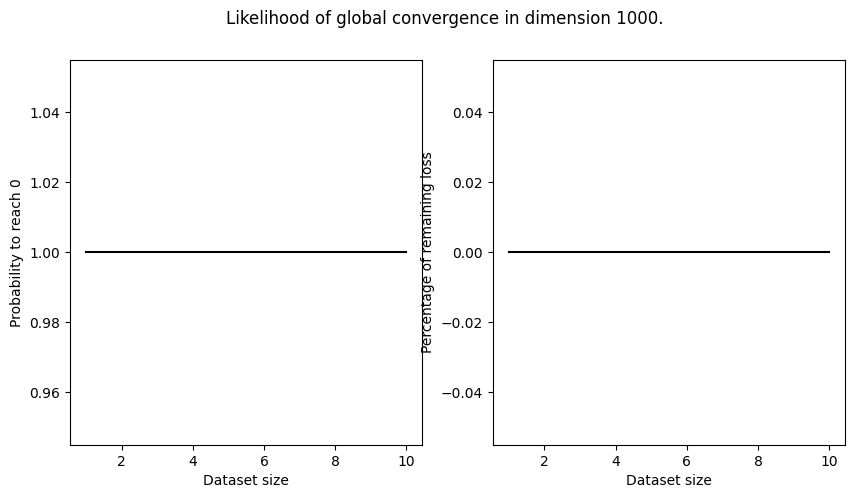

In [ ]:
"""
EXP1: d=100.
"""

d=1000
hid_dim=10  
list_n = [n for n in range(1, 10+1, 1)]
repetition=1
epsilon=0.05
lr=1e-2

Loss_trend = []
CV_Probability = []
for n in list_n:
    p=4*int(np.floor(np.log(n/epsilon)/np.log(4/3))+1)+10
    loss = 0.
    proba = 0.
    for _ in range(repetition):
        model = One_hidden_layer(d, p)
        data = generate_data_exp1(d, n, hid_dim) # ??? This generates data which are not possible to fit !
        DATA = generate_data_exp2(d, n)
        data = (data[0], DATA[1])
        c_min = t.min(t.abs(data[1]))
        print(c_min)
        c_max = t.max(t.abs(data[1]))
        print(c_max)

        output_norm = t.sqrt(t.sum(data[1]**2)/(n))
        epoch = 10000#int(1.5*np.sqrt(n*p)*np.log(n*p)/(4*lr)+1) # This value corresponds to 2 times the phase transition threshold.
        
        Loss = train(model, data, lr, epoch, cv_threshold=0, verbose=True)
        plt.plot(Loss)
        plt.show()
        print(n)


        if Loss[-1] <= c_min*p/(2*n):
            loss += 0.
            proba += 1/repetition
        else:
            loss += Loss[-1]/(repetition*Loss[0])
            proba += 0.

    Loss_trend.append(loss)
    CV_Probability.append(proba)

results = {
        'n': list_n,
        'd': [d]*len(list_n),
        'loss_trend': Loss_trend,
        'CV_probability': CV_Probability,
    }
data = pd.DataFrame(results)
data.to_csv(f'raw experiments/Data_exp_1_{d}.csv', index=False)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))

ax[0].plot(list_n, CV_Probability, c='k')
ax[0].set_ylabel("Probability to reach 0")
ax[0].set_xlabel("Dataset size")

ax[1].plot(list_n, Loss_trend, c='k')
ax[1].set_ylabel("Percentage of remaining loss")
ax[1].set_xlabel("Dataset size")

fig.suptitle(f"Likelihood of global convergence in dimension {d}.")
plt.show()